# Statistics With Python

Info based on Codecademy, 2022.

## Mean

Finding the center of a dataset is one of the most common ways to summarize statistical findings. Often, people communicate the center of data using words like, on average, usually, or often.

### Calculating Mean

The mean, often referred to as the average, is a way to measure the center of a dataset.

The average of a set is calculated using a two-step process:

1. Add all of the observations in your dataset.
2. Divide the total sum from step one by the number of points in your dataset.

$$\bar{x} = \frac{x_1 + x_2 … + x_{n}}{n} $$

The equation above is used to calculate mean. `x1`, `x2`, … `xn` are observations from a dataset of `n` observations.

### NumPy Average

While you can calculate the average yourself, it becomes time-consuming as the size of your dataset increases — imagine adding all of the numbers in a dataset with 10,000 observations.

The NumPy `.average()` or `.mean()` function can do the work of adding and dividing for you. 

```python
example_array = np.array([24, 16, 30, 10, 12, 28, 38, 2, 4, 36])
 
example_average = np.average(example_array)
 
print(example_average)

```
The most important outcome is that we’re able to use a single number as a measure of centrality. Although histograms provide more information, they are not a concise or precise measure of centrality.

In [18]:
example_array = np.array([24, 16, 30, 10, 12, 28, 38, 2, 4, 36])
example_average = np.average(example_array)
print(example_average)

20.0


The average age of the 100 greatest authors, according to Le Monde is: 42.12


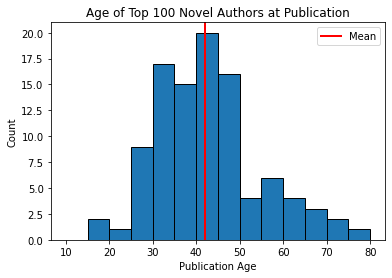

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

greatest_books = pd.read_csv("top_hundred_books.csv")

author_ages = greatest_books['Ages']

average_age = np.average(author_ages)

print("The average age of the 100 greatest authors, according to Le Monde is: " + str(average_age))

plt.hist(author_ages, range=(10, 80), bins=14,  edgecolor='black')
plt.title("Age of Top 100 Novel Authors at Publication")
plt.xlabel("Publication Age")
plt.ylabel("Count")
plt.axvline(average_age, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.legend()
plt.show()

## Median

The formal definition for the median of a dataset is:

_The value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, you either report both of the middle two values or their average._

There are always two steps to finding the median of a dataset:

1. Order the values in the dataset from smallest to largest
2. Identify the number(s) that fall(s) in the middle

### Median NumPy

Finding the median of a dataset becomes increasingly time-consuming as the size of your dataset increases — imagine finding the median of an unsorted dataset with 10,000 observations.

The NumPy `.median()` function can do the work of sorting, then finding the median for you. 
```python
example_array = np.array([24, 16, 30, 10, 12, 28, 38, 2, 4, 36, 42])
 
example_median = np.median(example_array)
 
print(example_median)

```
Notice that the mean and the median are nearly equal. This is not a surprising result, as both statistics are a measure of the dataset’s center. However, it’s worth noting that these results will not always be so close.

In [17]:
example_array = np.array([24, 16, 30, 10, 12, 28, 38, 2, 4, 36, 42])
example_median = np.median(example_array)
print(example_median)

24.0


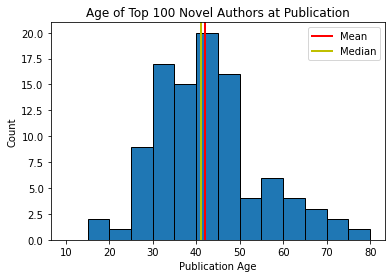

In [6]:
median_age = np.median(author_ages)

plt.hist(author_ages, range=(10, 80), bins=14,  edgecolor='black')
plt.title("Age of Top 100 Novel Authors at Publication")
plt.xlabel("Publication Age")
plt.ylabel("Count")
plt.axvline(average_age, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(median_age, color='y', linestyle='solid', linewidth=2, label="Median")
plt.legend()

plt.show()

## Mode

The formal definition for the mode of a dataset is:

_The most frequently occurring observation in the dataset. A dataset can have multiple modes if there is more than one value with the same maximum frequency._

### Mode SciPy

Finding the mode of a dataset becomes increasingly time-consuming as the size of your dataset increases — imagine finding the mode of a dataset with 10,000 observations.

The SciPy `stats.mode()` function can do the work of finding the mode for you. 

```python
from scipy import stats
 
example_array = np.array([24, 16, 12, 10, 12, 28, 38, 12, 28, 24])
 
example_mode = stats.mode(example_array)

```
The result of `stats.mode()` is an object with the mode value, and its count.

```
>>> example_mode
ModeResult(mode=array([12]), count=array([3]))

```

If there are multiple modes, the `stats.mode()` function will always return the smallest mode in the dataset.

```python
from scipy import stats
 
example_array = np.array([24, 16, 12, 10, 12, 24, 38, 12, 28, 24])
 
example_mode = stats.mode(example_array)
```

The result of `stats.mode()` is an object with the smallest mode value, and its count.

```
>>> example_mode
ModeResult(mode=array([12]), count=array([3]))
```

In [16]:
from scipy import stats
example_array = np.array([24, 16, 12, 10, 12, 24, 38, 12, 28, 24])
example_mode = stats.mode(example_array, keepdims=True)
print(example_mode)

ModeResult(mode=array([12]), count=array([3]))


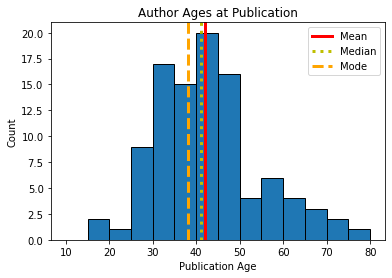

In [13]:
mode_age = stats.mode(author_ages, keepdims=True)[0]

plt.hist(author_ages, range=(10, 80), bins=14,  edgecolor='black')
plt.title("Author Ages at Publication")
plt.xlabel("Publication Age")
plt.ylabel("Count")
plt.axvline(average_age, color='r', linestyle='solid', linewidth=3, label="Mean")
plt.axvline(median_age, color='y', linestyle='dotted', linewidth=3, label="Median")
plt.axvline(mode_age, color='orange', linestyle='dashed', linewidth=3, label="Mode")
plt.legend()

plt.show()

## Variance

Finding the mean, median, and mode of a dataset is a good way to start getting an understanding of the general shape of your data. However, those three descriptive statistics only tell part of the story. Consider the two datasets below:

```python
dataset_one = [-4, -2, 0, 2, 4]
dataset_two = [-400, -200, 0, 200, 400]
```
These two datasets have the same mean and median — both of those values happen to be 0. If we only reported these two statistics, we would not be communicating any meaningful difference between these two datasets.

This is where _variance_ comes into play. Variance is a descriptive statistic that describes how spread out the points in a data set are.

### Distance From Mean

Now that you have learned the importance of describing the spread of a dataset, let’s figure out how to mathematically compute this number.

How would you attempt to capture the spread of the data in a single number?

Let’s start with our intuition — we want the variance of a dataset to be a large number if the data is spread out, and a small number if the data is close together.

<img src='two_histograms.svg' style='max-height: 1000px'>
A lot of people may initially consider using the range of the data. But that only considers two points in your entire dataset. Instead, we can include every point in our calculation by finding the difference between every data point and the mean.

<img src='difference.svg' style='max-height: 1000px'>
If the data is close together, then each data point will tend to be close to the mean, and the difference will be small. If the data is spread out, the difference between every data point and the mean will be larger.

Mathematically, we can write this comparison as

$$\text{difference} = X - \mu$$

Where `X` is a single data point and the Greek letter `mu` is the mean.

### Average Distances

The whole point of calculating variance is to get one number that describes the dataset. We don’t want to report multiple values — we want to combine those into one descriptive statistic.

To do this, we’ll take the average of those distances to the mean. By adding those numbers together and dividing by the total, we’ll end up with a single number that describes the average distance between our data points and the mean.

### Square The Differences

Consider this very small dataset:

```
[-5, 5]
```
The mean of this dataset is `0`, so when we find the difference between each point and the mean we get `-5 - 0 = -5` and `5 - 0 = 5`.

When we take the average of `-5` and `5` to get the variance, we get `0`!

Now think about what would happen if the dataset were `[-200, 200]`. We’d get the same result! That can’t possibly be right — the dataset with `200` is much more spread out than the dataset with `5`, so the variance should be much larger!

The problem here is with negative numbers. Because one of our data points was 5 units below the mean and the other was 5 units above the mean, they canceled each other out!

When calculating variance, we don’t care if a data point was above or below the mean — all we care about is how far away it was. To get rid of those pesky negative numbers, we’ll square the difference between each data point and the mean.

Our equation for finding the difference between a data point and the mean now looks like this:

$$\text{difference} = (X - \mu)^2$$

### Variance In NumPy

The full equation for the variance is as follows:

$$\sigma^2 = \frac{\sum_{i=1}^{N}{(X_i -\mu)^2}}{N}$$

Let’s dissect this equation a bit.

- Variance is usually represented by the symbol sigma squared.
- We start by taking every point in the dataset — from point number 1 to point number N — and finding the difference between that point and the mean.
- Next, we square each difference to make all differences positive.
- Finally, we average those squared differences by adding them together and dividing by N, the total number of points in the dataset.

All of this work can be done quickly using Python’s NumPy library. The `var()` function takes a list of numbers as a parameter and returns the variance of that dataset.

```python
import numpy as np
 
dataset = [3, 5, -2, 49, 10]
variance = np.var(dataset)
```
Variance is useful because it is a measure of spread. While we might get a general understanding of the spread by looking at a histogram, computing the variance gives us a numerical value that helps us describe the level of confidence of our comparison.

In [20]:
dataset = [3, 5, -2, 49, 10]
variance = np.var(dataset)
print(variance)

338.8


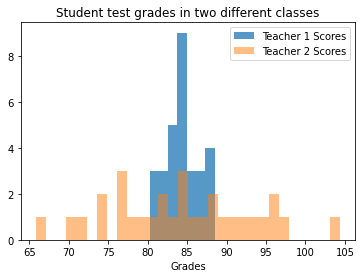

The mean of the test scores in teacher one's class is 84.46766666666666
The mean of the test scores in teacher two's class is 84.29799999999999
The variance of the test scores in teacher one's class is 4.266517888888889
The variance of the test scores in teacher two's class is 78.13198933333337


In [21]:
teacher_one_grades = [80.24, 81.15, 81.29, 82.12, 82.52, 82.54, 82.76, 83.37, 83.42, 83.45, 83.47, 83.79, 83.91, 83.98, 84.03, 84.69, 84.74, 84.89, 84.95, 84.95, 85.02, 85.18, 85.53, 86.29, 86.83, 87.29, 87.47, 87.62, 88.04, 88.5]
teacher_two_grades = [65.82, 70.77, 71.46, 73.63, 74.62, 76.53, 76.86, 77.06, 78.46, 79.81, 80.64, 81.61, 81.84, 83.67, 84.44, 84.73, 84.74, 85.15, 86.55, 88.06, 88.53, 90.12, 91.27, 91.62, 92.86, 94.37, 95.64, 95.99, 97.69, 104.4]

teacher_one_variance = np.var(teacher_one_grades)
teacher_two_variance = np.var(teacher_two_grades)

plt.hist(teacher_one_grades, alpha = 0.75, label = "Teacher 1 Scores", bins = 7)
plt.hist(teacher_two_grades, alpha = 0.5, label = "Teacher 2 Scores", bins = 30)
plt.title("Student test grades in two different classes")
plt.xlabel("Grades")
plt.legend()
plt.show()

print("The mean of the test scores in teacher one's class is " + str(np.mean(teacher_one_grades)))
print("The mean of the test scores in teacher two's class is " + str(np.mean(teacher_two_grades)))

print("The variance of the test scores in teacher one's class is " +str(teacher_one_variance))
print("The variance of the test scores in teacher two's class is " +str(teacher_two_variance))


## Standard Deviation

When beginning to work with a dataset, one of the first pieces of information you might want to investigate is the spread — is the data close together or far apart? One of the tools in our statistics toolbelt to do this is the descriptive statistic variance:

$$\sigma^2 = \frac{\sum_{i=1}^{N}{(X_i -\mu)^2}}{N}$$
 
By finding the variance of a dataset, we can get a numeric representation of the spread of the data. But what does that number really mean? How can we use this number to interpret the spread?

It turns out, using variance isn’t necessarily the best statistic to use to describe spread. Luckily, there is another statistic — standard deviation — that can be used instead.

Variance is a tricky statistic to use because its units are different from both the mean and the data itself. For example, if the mean of a group of NBA players is `77.98` inches, we can say someone who is 80 inches tall is about two inches taller than the average of that group. However, because the formula for variance includes squaring the difference between the data and the mean, the variance is measured in units squared. For example, a value of `13.32` inches squared for the variance is hard to interpret in context with the mean or the data because their units are different. This is where the statistic _standard deviation_ is useful.

Standard deviation is computed by taking the square root of the variance. `sigma` is the symbol commonly used for standard deviation. Conveniently, `sigma` squared is the symbol commonly used for variance:

$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{\sum_{i=1}^{N}{(X_i -\mu)^2}}{N}}$$
 
In Python, you can take the square root of a number using `** 0.5`:

```python
num = 25
num_square_root = num ** 0.5
```

### Standard Deviation in NumPy

There is a NumPy function dedicated to finding the standard deviation of a dataset — we can cut out the step of first finding the variance. The NumPy function `std()` takes a dataset as a parameter and returns the standard deviation of that dataset:

```python
import numpy as np
 
dataset = [4, 8, 15, 16, 23, 42]
standard_deviation = np.std(dataset)
```

In [25]:
dataset = [4, 8, 15, 16, 23, 42]
standard_deviation = np.std(dataset)
print(standard_deviation)

12.315302134607444


In [27]:
from some_heights import nba_data, okcupid_data

nba_standard_deviation = np.std(nba_data)
okcupid_standard_deviation = np.std(okcupid_data)
print("The standard deviation of the NBA dataset is " + str(nba_standard_deviation))
print("The standard deviation of the OkCupid dataset is " + str(okcupid_standard_deviation))

The standard deviation of the NBA dataset is 3.6501704069810224
The standard deviation of the OkCupid dataset is 3.924360330041063


## Using Standard Deviation

Now that our units match, our measure of spread is easier to interpret. By finding the number of standard deviations a data point is away from the mean, we can begin to investigate how unusual that datapoint truly is. In fact, you can usually expect around **68%** of your data to fall within one standard deviation of the mean, **95%** of your data to fall within two standard deviations of the mean, and **99.7%** of your data to fall within three standard deviations of the mean.

<img src='normal_curve.svg' style='max-height: 1000px'>
If you have a data point that is over three standard deviations away from the mean, that's an incredibly unusual piece of data! The standard deviation gives you a statistic about spread that can be easily interpreted and compared to the mean.

In [29]:
nba_mean = np.mean(nba_data)
okcupid_mean = np.mean(okcupid_data)

nba_standard_deviation = np.std(nba_data)
okcupid_standard_deviation = np.std(okcupid_data)

player_age = 80

nba_difference = player_age - nba_mean
okcupid_difference = player_age - okcupid_mean

num_nba_deviations = nba_difference/nba_standard_deviation
num_okcupid_deviations = okcupid_difference/okcupid_standard_deviation


print("Your basketball player is " + str(num_nba_deviations) + " standard deviations away from the mean of NBA player heights\n")
print("Your basketball player is " + str(num_okcupid_deviations) + " standard deviations away from the mean of OkCupid profile heights")

Your basketball player is 0.5523029818400713 standard deviations away from the mean of NBA player heights

Your basketball player is 2.9523282842579257 standard deviations away from the mean of OkCupid profile heights


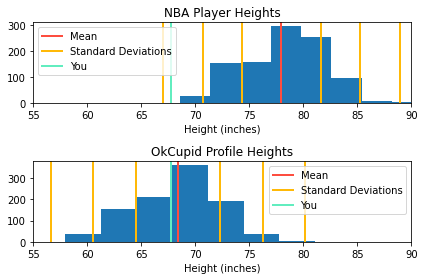

In [30]:
nba_mean = np.mean(nba_data)
okcupid_mean = np.mean(okcupid_data)

your_height = 67.72

nba_standard_deviation = np.std(nba_data)
okcupid_standard_deviation = np.std(okcupid_data)

plt.subplot(211)
plt.title("NBA Player Heights")
plt.xlabel("Height (inches)")

plt.hist(nba_data)

plt.axvline(nba_mean, color='#FD4E40', linestyle='solid', linewidth=2, label = "Mean")

plt.axvline(nba_mean + nba_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2, label = "Standard Deviations")
plt.axvline(nba_mean - nba_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(nba_mean + nba_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(nba_mean - nba_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(nba_mean + nba_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(nba_mean - nba_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(your_height, color='#62EDBF', linestyle='solid', linewidth=2, label = "You")

plt.xlim(55, 90)
plt.legend()


plt.subplot(212)
plt.title("OkCupid Profile Heights")
plt.xlabel("Height (inches)")

plt.hist(okcupid_data)

plt.axvline(okcupid_mean, color='#FD4E40', linestyle='solid', linewidth=2, label = "Mean")

plt.axvline(okcupid_mean + okcupid_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2, label = "Standard Deviations")
plt.axvline(okcupid_mean - okcupid_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(okcupid_mean + okcupid_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(okcupid_mean - okcupid_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(okcupid_mean + okcupid_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(okcupid_mean - okcupid_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(your_height, color='#62EDBF', linestyle='solid', linewidth=2, label = "You")

plt.xlim(55, 90)
plt.legend()




plt.tight_layout()
plt.show()


## Histograms

Statistics is often pitched as a way to find certainty through data. The power of statistics is more often used to communicate that certainty doesn’t really exist. Instead, it provides tools to communicate how uncertain we are about a problem.

There’s no better tool to visualize the uncertainty and chaos in data than a histogram. A histogram displays the distribution of your underlying data.

Histograms reveal, through numbers, interpretable trends in your data. They don’t provide a yes or no answer, but are often used as a starting point for discussion and informing an answer to your data.


### Summarizing Your Data

The purpose of a histogram is to summarize data that you can use to inform a decision or explain a distribution.

While a histogram is one of the most useful tools for communicating trends, people often use the average of a dataset to make broad claims about its underlying trends.

While the average value of data may be useful to interpret where the data is centered, it can also be misleading.

## Range

Histograms are helpful for understanding how your data is distributed. While the average time a customer may arrive at the grocery store is 3 pm, the manager knows 3 pm is not the busiest time of day.

Before identifying the busiest times of the day, it’s important to understand the extremes of your data: the minimum and maximum values in your dataset. With the minimums and maximums, you can calculate the range.

The range of your data is the difference between the maximum value and the minimum value in your dataset.

$$range = max(data)\ -\ min(data)$$

In [34]:
transactions = pd.read_csv("transactions.csv")
transactions = transactions.drop(["Unnamed: 0"], axis = 1)

times = transactions["Transaction Time"].values
cost = transactions["Cost"].values

print(transactions)
print(np.average(times))

min_time = np.amin(times) 
max_time = np.amax(times) 
range_time = max_time - min_time 

print("Earliest Time: " + str(min_time))
print("Latest Time: " + str(max_time))
print("Time Range: " + str(range_time))

     Transaction Time        Cost
0            7.939419   98.422021
1            4.314811   87.329861
2            6.394080  112.334882
3            7.031504   87.570689
4            5.840730   97.321191
..                ...         ...
995         18.728278   34.802198
996         18.183858   36.349422
997         16.803236   59.230032
998         19.680992   23.748946
999         23.369355   57.442948

[1000 rows x 2 columns]
14.943439668312365
Earliest Time: 0.0266151836095787
Latest Time: 23.675374635328755
Time Range: 23.648759451719176


## Bins and Count

In the previous exercise, you found that the earliest transaction time is close to 0, and the latest transaction is close to 24, making your range nearly 24 hours.

Now, we have the information we need to start building our histogram. The two key features of a histogram are _bins_ and _counts_.

### Bins

A bin is a sub-range of values that falls within the range of a dataset. In the grocery store example, a valid bin may be from 0 hours to 6 hours. This bin includes all times from just after midnight (0) until 6 am (6).

Additionally, all bins in a histogram must be the same width.

If the range of values in our dataset is from 0 to 24, and the first bin in our grocery store example is from 0 to 6, can you figure out the minimums and maximums of the other bins?

The grocery store bins are:

- 0 to 6 hours
- 6 to 12 hours
- 12 to 18 hours
- 18 to 24 hours

### Counts

A _count_ is the number of values that fall within a bin’s range. For example, if 100 customers arrive at your grocery store between midnight (0) and 6 am (6), your count for that bin is equal to 100.

## Histograms

While counting the number of values in a bin is straightforward, it is also time-consuming. For these situations, we can use the `numpy.histogram()` function. 

```python
exercise_ages = np.array([22, 27, 45, 62, 34, 52, 42, 22, 34, 26, 24, 65, 34, 25, 45, 23, 45, 33, 52, 55])
 
np.histogram(exercise_ages, range = (20, 70), bins = 5)

```
Below, we explain each of the function’s inputs:

- `exercise_ages` is the input array
- `range = (20, 70)` — is the range of values we expect in our array. Range includes everything from 20, up until but not including 70.
- bins = 5 is the number of bins. Python will automatically calculate equally-sized bins based on the range and number of bins.
Below, you can see the output of the `numpy.histogram()` function:

```
(array([7, 4, 4, 3, 2]), array([20., 30., 40., 50., 60., 70.]))
```

The first array, `array([7, 4, 4, 3, 2])`, is the counts for each bin. The second array, `array([20., 30., 40., 50., 60., 70.])`, includes the minimum and maximum values for each bin:

- **Bin 1**: 20 to <30
- **Bin 2**: 30 to <40
- **Bin 3**: 40 to <50
- **Bin 4**: 50 to <60
- **Bin 5**: 60 to <70

In [35]:
times_hist = np.histogram(times, range=(0, 24), bins=4)
print(times_hist)

(array([101, 231, 213, 455], dtype=int64), array([ 0.,  6., 12., 18., 24.]))


## Plotting a Histogram

At this point, you’ve learned how to find the numerical inputs to a histogram. Thus far the size of our datasets and bins have produced results that we can interpret. This becomes increasingly difficult as the number of bins in a histogram increases.

Because of this, histograms are typically viewed graphically, with bin ranges on the x-axis and counts on the y-axis. The figure below shows the graphical representation of the histogram for our exercise class example from last exercise. Notice, there are five equally-spaced bars, with each displaying a count for an age range. Compare the graph to the table, just below it.

<img src='age-distribution.png' style='max-height: 400px'>

Histograms are an easy way to visualize trends in your data. When I look at the above graph, I think, “More people in the exercise class are in their twenties than any other decade. Additionally, the histogram is skewed, indicating the class is made of more younger people than older people.”

We created the plot above using the matplotlib.pyplot package. 


We plotted the histogram with the following code. Notice, the bins `range` and `bins` arguments are the same as we used in the last exercise:

```python
from matplotlib import pyplot as plt

plt.hist(exercise_ages, range = (20, 70), bins = 5, edgecolor='black')
 
plt.title("Decade Frequency")
plt.xlabel("Ages")
plt.ylabel("Count")
 
plt.show()
```
In the code above, we used the `plt.hist()` function to create the plot, then added a title, x-label, and y-label before showing the graph with `plt.show()`.

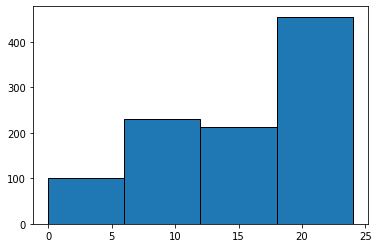

In [36]:
plt.hist(times, range=(0, 24), bins=4, edgecolor='black')
plt.show()

## Finding your Best Bin Size
The figure below displays the graph that you created in the last exercise:

<img src='customer-frequency.png' style='max-height:400px'>

This histogram is helpful for our store manager. The last six hours of the day are the busiest — from 6 pm until midnight. Does this mean the manager should staff their grocery store with the most employees between 6 pm and midnight?

To the manager, this doesn’t make much sense. The manager knows the store is busy when many people get off work, but the rush certainly doesn’t continue later than 9 pm.

The issue with this histogram is that we have too few bins. When plotting a histogram, it’s essential to select bins that fully capture the trends in the underlying data. Often, this will require some guessing and checking. There isn’t much of a science to selecting bin size.

How many bins do you think makes sense for this example? I would try 24 because there are 24 hours in a day.

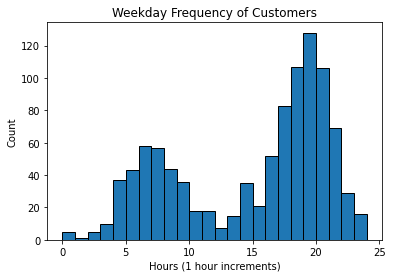

In [37]:
plt.hist(times, range=(0, 24), bins=24,  edgecolor="black")
plt.title("Weekday Frequency of Customers")
plt.xlabel("Hours (1 hour increments)")
plt.ylabel("Count")

plt.show()

Now, the store manager wants a histogram of transaction costs. Try plotting a histogram for the cost variable.

Some things to think about:

- What is a reasonable minimum for transaction data? Maybe 0 dollars.
- What is a reasonable maximum for the transaction data? Using np.amax(cost), we get 161.4. So, you could make the maximum 165.
- How many bins should you use to adequately represent the data? Do some guess and check work to figure this out.

Finally, think about how this data could be useful to the store manager.

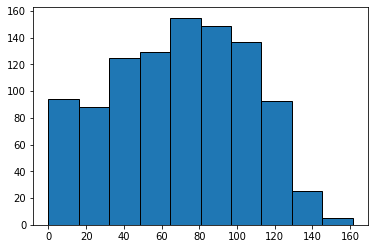

In [38]:
plt.hist(cost, range=(np.amin(cost), np.amax(cost)), bins=10, edgecolor='black')
plt.show()

## Describing Histograms

While many people know the functions to plot a histogram, few spend the time to learn how to fully, and concisely communicate what it means.
We can describe a histogram (distribution) using the following five features of a dataset:

- Center
- Spread
- Skew
- Modality
- Outliers

### Center

One of the most common ways to summarize a dataset is to communicate its center. We use average and median as our measures of centrality. The figure below shows the average and median ages of a dataset of 100 authors. As expected, the average and median values are near the center of the distribution.

<img src='mean-median.png' style='max-height:1000px'>

While it’s good practice to communicate both the average and median values, the average is generally more common.

### Spread

Once you’ve found the center of your data, you can shift to identifying the extremes of your dataset: the minimum and maximum values. These values, taken with the mean and median, begin to indicate the shape of the underlying dataset. Take the histogram below as an example:

<img src='mean-median.png' style='max-height:1000px'>

The minimum value of this data is 18, and the maximum value is 76.

You can calculate the range using the following:

$$range = max - min$$

The range of this dataset is

$$range = 76 - 18 = 58$$

### Skew

Once you have the center and range of your data, you can begin to describe its shape. The skew of a dataset is a description of the data’s symmetry. 

A dataset with one prominent peak, and similar tails to the left and right is called symmetric. The median and mean of a symmetric dataset are similar.

<img src='distribution-types-ii-symmetric.svg' style='max-height:1000px'>

A histogram with a tail that extends to the right is called a right-skewed dataset. The median of this dataset is less than the mean.

<img src='distribution-types-ii-skew-right.svg' style='max-height:1000px'>

A histogram with one prominent peak to the right, and a tail that extends to the left is called a left-skewed dataset. The median of this dataset is greater than the mean.

<img src='distribution-types-ii-skew-left.svg' style='max-height:1000px'>

### Modality

The modality describes the number of peaks in a dataset. Thus far, we have only looked at datasets with one distinct peak, known as unimodal. This is the most common.

<img src='unimodal_new.svg' style='max-height:400px'>

A bimodal dataset has two distinct peaks.

<img src='bimodal_new.svg' style='max-height:400px'>

A multimodal dataset has more than two peaks. The histogram below displays three peaks.

<img src='multimodal_new.svg' style='max-height:400px'>

You may also see datasets with no obvious clustering. Datasets such as these are called uniform distributions.

<img src='uniform_new.svg' style='max-height:400px'>

### Outliers

An outlier is a data point that is far away from the rest of the dataset. Outliers do not have a formal definition, but are easy to determine by looking at histogram. The histogram below shows an example of an outlier. There is one datapoint that is much larger than the rest.

<img src='outlier.png' style='max-height:400px'>

If you see an outlier in your dataset, it’s worth reporting and investigating. This data can often indicate an error in your data or an interesting insight.

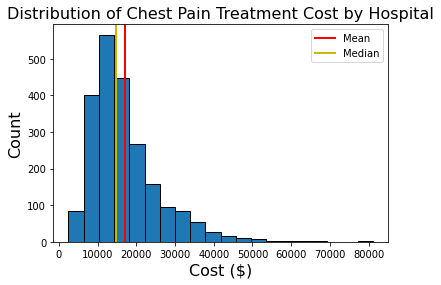

In [39]:
cp_data = pd.read_csv("cp.csv") 

cp_average = cp_data[' Average Covered Charges '].mean()

cp_median = cp_data[' Average Covered Charges '].median()

plt.hist(cp_data[' Average Covered Charges '], bins=20, edgecolor='black')

plt.title("Distribution of Chest Pain Treatment Cost by Hospital", fontsize = 16)
plt.xlabel("Cost ($)", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.axvline(cp_average, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(cp_median, color='y', linestyle='solid', linewidth=2, label="Median")
plt.legend()

plt.show()

In [40]:
cp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            2230 non-null   int64  
 1   DRG Definition                        2230 non-null   object 
 2   Provider Id                           2230 non-null   int64  
 3   Provider Name                         2230 non-null   object 
 4   Provider Street Address               2230 non-null   object 
 5   Provider City                         2230 non-null   object 
 6   Provider State                        2230 non-null   object 
 7   Provider Zip Code                     2230 non-null   int64  
 8   Hospital Referral Region Description  2230 non-null   object 
 9    Total Discharges                     2230 non-null   int64  
 10   Average Covered Charges              2230 non-null   float64
 11   Average Total Pa

In [41]:
n = len(cp_data[' Average Covered Charges '])
min_val = np.amin(cp_data[' Average Covered Charges '])
max_val = np.amax(cp_data[' Average Covered Charges '])
range_val = max_val - min_val

In [42]:
summary = f'''
This histogram displays the distribution of chest pain cost for over {n} hospitals across the United States. 
The average and median costs are ${round(cp_average)} and ${round(cp_median)}, respectively. 
Given that the data is unimodal, with one local maximum and a right skew, the fact that the average is greater than the median, matches our expectation.
The range of costs is very large, ${range_val}, with the smallest cost equal to ${min_val} and the largest cost equal to ${max_val}. 
There is one hospital, Bayonne Hospital Center, that charges far more than the rest at $81,083.
'''

In [43]:
print(summary)


This histogram displays the distribution of chest pain cost for over 2230 hospitals across the United States. 
The average and median costs are $16948 and $14660, respectively. 
Given that the data is unimodal, with one local maximum and a right skew, the fact that the average is greater than the median, matches our expectation.
The range of costs is very large, $78623.6, with the smallest cost equal to $2459.4 and the largest cost equal to $81083.0. 
There is one hospital, Bayonne Hospital Center, that charges far more than the rest at $81,083.



# Quartiles

A common way to communicate a high-level overview of a dataset is to find the values that split the data into four groups of equal size.

By doing this, we can then say whether a new datapoint falls in the first, second, third, or fourth quarter of the data.

<img src='quartiles.svg' style='max-height:1000px'>
The values that split the data into fourths are the quartiles.

Those values are called the first quartile (Q1), the second quartile (Q2), and the third quartile (Q3). In the image above, Q1 is 10, Q2 is 13, and Q3 is 22. Those three values split the data into four groups that each contain five datapoints.

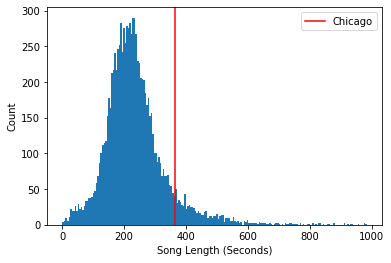

In [44]:
from song_data import songs
plt.hist(songs, bins = 200)
plt.axvline(x=364, label="Chicago", c = 'r')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.legend()
plt.show()

## The Second Quartile

Let’s begin by finding the second quartile (Q2). Q2 happens to be exactly the median. Half of the data falls below Q2 and half of the data falls above Q2.

The first step in finding the quartiles of a dataset is to sort the data from smallest to largest. For example, below is an unsorted dataset:

$$ [8, 15, 4, -108, 16, 23, 42]$$

After sorting the dataset, it looks like this:

$$[-108, 4, 8, 15, 16, 23, 42]$$

Now that the list is sorted, we can find Q2. In the example dataset above, Q2 (and the median) is 15 — there are three points below 15 and three points above 15.

### Even Number of Datapoints

You might be wondering what happens if there is an even number of points in the dataset. For example, if we remove the -108 from our dataset, it will now look like this:

$$[4, 8, 15, 16, 23, 42]$$

Q2 now falls somewhere between 15 and 16. There are a couple of different strategies that you can use to calculate Q2 in this situation. One of the more common ways is to take the average of those two numbers. In this case, that would be 15.5.

Recall that you can find the average of two numbers by adding them together and dividing by two.

## Q1 and Q3

Now that we’ve found Q2, we can use that value to help us find Q1 and Q3. Recall our demo dataset:

$$[-108, 4, 8, 15, 16, 23, 42]$$

In this example, Q2 is 15. To find Q1, we take all of the data points smaller than Q2 and find the median of those points. In this case, the points smaller than Q2 are:

$$[-108, 4, 8]$$

The median of that smaller dataset is 4. That’s Q1!

To find Q3, do the same process using the points that are larger than Q2. We have the following points:

$$[16, 23, 42]$$

The median of those points is 23. That’s Q3! We now have three points that split the original dataset into groups of four equal sizes.

There is another method that is equally accepted that results in different values! There is no universally agreed upon method of calculating quartiles, and as a result, two different tools might report different results.

The second method includes Q2 when trying to calculate Q1 and Q3. Let’s take a look at an example:

$$[-108, 4, 8, 15, 16, 23, 42]$$

Using the first method, we found Q1 to be 4. When looking at all of the points below Q2, we excluded Q2. Using this second method, we include Q2 in each half.

For example, when calculating Q1 using this new method, we would now find the median of this dataset:

$$[-108, 4, 8, 15]$$
Using this method, Q1 is 6.

### Quartiles in NumPy

There is a function in the NumPy library that will find the quartiles for you. The NumPy function that we’ll be using is named `quantile()`. 
```python
import numpy as np
 
dataset = [50, 10, 4, -3, 4, -20, 2]
third_quartile = np.quantile(dataset, 0.75)

```
The `quantile()` function takes two parameters. The first is the dataset you’re interested in. The second is a number between 0 and 1. Since we calculated the third quartile, we used 0.75 — we want the point that splits the first 75% of the data from the rest.

For the second quartile, we’d use 0.5. This will give you the point that 50% of the data is below and 50% is above.

Notice that the dataset doesn’t need to be sorted for NumPy’s function to work!

Quartiles are so commonly used that the three quartiles, along with the minimum and the maximum values of a dataset, are called the five-number summary of the dataset. These five numbers help you quickly get a sense of the range, centrality, and spread of the dataset.

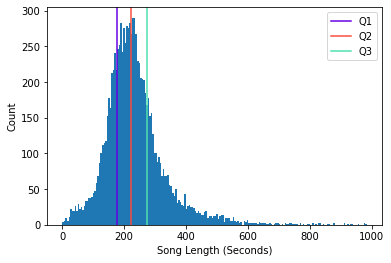

In [46]:
q1 = np.quantile(songs, 0.25)
q2 = np.quantile(songs, 0.5)
q3 = np.quantile(songs, 0.75)

plt.hist(songs, bins = 200)
plt.axvline(x=q1, label="Q1", c = '#6400e4')
plt.axvline(x=q2, label="Q2", c = '#fd4d3f')
plt.axvline(x=q3, label="Q3", c = '#4fe0b0')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Quantiles

Quantiles are points that split a dataset into groups of equal size. For example, let’s say you just took a test and wanted to know whether you’re in the top 10% of the class. One way to determine this would be to split the data into ten groups with an equal number of datapoints in each group and see which group you fall into.

<img src='deciles.svg' style='max-height:1000px'>

There are nine values that split the dataset into ten groups of equal size — each group has 3 different test scores in it.

Those nine values that split the data are quantiles! Specifically, they are the 10-quantiles, or deciles.

You can find any number of quantiles. For example, if you split the dataset into 100 groups of equal size, the 99 values that split the data are the 100-quantiles, or percentiles.

The quartiles are some of the most commonly used quantiles. The quartiles split the data into four groups of equal size.

In this lesson, we’ll show you how to calculate quantiles using NumPy and discuss some of the most commonly used quantiles.

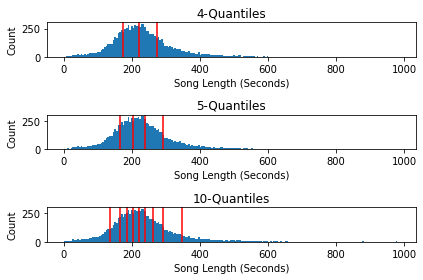

In [47]:
q1 = np.quantile(songs, 0.25)
q2 = np.quantile(songs, 0.5)
q3 = np.quantile(songs, 0.75)

plt.subplot(3,1,1)
plt.hist(songs, bins = 200)
plt.axvline(x=q1, c = 'r')
plt.axvline(x=q2, c = 'r')
plt.axvline(x=q3, c = 'r')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.title("4-Quantiles")

plt.subplot(3,1,2)
plt.hist(songs, bins = 200)
plt.axvline(x=np.quantile(songs, 0.2), c = 'r')
plt.axvline(x=np.quantile(songs, 0.4), c = 'r')
plt.axvline(x=np.quantile(songs, 0.6), c = 'r')
plt.axvline(x=np.quantile(songs, 0.8), c = 'r')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.title("5-Quantiles")

plt.subplot(3,1,3)
plt.hist(songs, bins = 200)
for i in range(1, 10):
  plt.axvline(x=np.quantile(songs, i/10), c = 'r')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.title("10-Quantiles")

plt.tight_layout()
plt.show()

## Many Quantiles

Quantiles are usually a set of values that split the data into groups of equal size. For example, you wanted to get the 5-quantiles, or the four values that split the data into five groups of equal size, you could use this code:

```python
import numpy as np
 
dataset = [5, 10, -20, 42, -9, 10]
ten_percent = np.quantile(dataset, [0.2, 0.4, 0.6, 0.8])

```
Note that we had to do a little math in our head to make sure that the values `[0.2, 0.4, 0.6, 0.8]` split the data into groups of equal size. Each group has 20% of the data.

<img src='even.svg' style='max-height:1000px'>

If we used the values `[0.2, 0.4, 0.7, 0.8]`, the function would return the four values at those split points. However, those values wouldn’t split the data into five equally sized groups. One group would only have 10% of the data and another group would have 30% of the data!

<img src='uneven.svg' style='max-height:1000px'>

## Common Quantiles
One of the most common quantiles is the 2-quantile. This value splits the data into two groups of equal size. Half the data will be above this value, and half the data will be below it. This is also known as the median!

<img src='median.svg' style='max-height:1000px'>

The 4-quantiles, or the quartiles, split the data into four groups of equal size. We found the quartiles in the previous exercise. Options

<img src='quartiles (1).svg' style='max-height:1000px'>
Finally, the percentiles, or the values that split the data into 100 groups, are commonly used to compare new data points to the dataset. You might hear statements like “You are above the 80th percentile in height”. This means that your height is above whatever value splits the first 80% of the data from the remaining 20%.

Here are some of the major takeaways about quantiles:

- Quantiles are values that split a dataset into groups of equal size.
- If you have n quantiles, the dataset will be split into n+1 groups of equal size.
- The median is a quantile. It is the only 2-quantile. Half the data falls below the median and half falls above the median.
- Quartiles and percentiles are other common quantiles. Quartiles split the data into 4 groups while percentiles split the data into 100 groups.

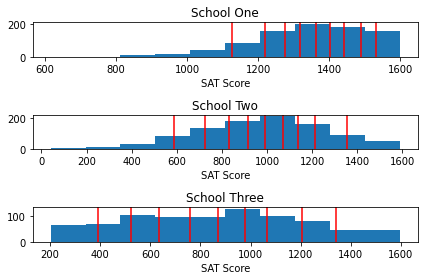

In [48]:
from schools_data import school_one, school_two, school_three

deciles_one = np.quantile(school_one, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
deciles_two = np.quantile(school_two, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
deciles_three = np.quantile(school_three, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.subplot(311)
plt.hist(school_one)
for decile in deciles_one:
  plt.axvline(x=decile, c = 'r')
plt.title("School One")
plt.xlabel("SAT Score")
  
plt.subplot(312)
plt.hist(school_two)
for decile in deciles_two:
  plt.axvline(x=decile, c = 'r')
plt.title("School Two")
plt.xlabel("SAT Score")
  
plt.subplot(313)
plt.hist(school_three)
for decile in deciles_three:
  plt.axvline(x=decile, c = 'r')
plt.title("School Three")
plt.xlabel("SAT Score")
plt.tight_layout()
plt.show()

## Interquartile Range

One of the most common statistics to describe a dataset is the _range_. The range of a dataset is the difference between the maximum and minimum values. While this descriptive statistic is a good start, it is important to consider the impact outliers have on the results:

<img src='outliers.svg' style='max-height: 1000px'>

In this image, most of the data is between 0 and 15. However, there is one large negative outlier (-20) and one large positive outlier (40). This makes the range of the dataset 60 (The difference between 40 and -20). That’s not very representative of the spread of the majority of the data!

The _interquartile range_ (IQR) is a descriptive statistic that tries to solve this problem. The IQR ignores the tails of the dataset, so you know the range around-which your data is centered.

The interquartile range is the difference between the third quartile (Q3) and the first quartile (Q1). For now, all you need to know is that the first quartile is the value that separates the first 25% of the data from the remaining 75%. The third quartile is the opposite — it separates the first 75% of the data from the remaining 25%.

<img src='interquartile.svg' style='max-height:1000px'>
The interquartile range is the difference between these two values.

In [49]:
q1 = np.quantile(songs, 0.25)
q3 = np.quantile(songs, 0.75)
interquartile_range = q3 - q1
print(interquartile_range)

99.53959000000003


## IQR in SciPy

The SciPy library has a function that can calculate the IQR all in one step.

The `iqr()` function takes a dataset as a parameter and returns the Interquartile Range. Notice that when we imported `iqr()`, we imported it from the stats submodule:

```python
from scipy.stats import iqr
 
dataset = [4, 10, 38, 85, 193]
interquartile_range = iqr(dataset)
```
Unlike the range, the IQR is robust. A statistic is robust when outliers have little impact on it. For example, the IQRs of the two datasets below are identical, even though one has a massive outlier.

```python
dataset_one = [6, 9, 10, 45, 190, 200] #IQR is 144.5
dataset_two = [6, 9, 10, 45, 190, 20000000] #IQR is 144.5
```
By looking at the IQR instead of the range, you can get a better sense of the spread of the middle of the data.

The interquartile range is displayed in a commonly-used graph — the box plot.

<img src='boxplot.webp' style='max-height:300px'>

In [50]:
from scipy.stats import iqr
interquartile_range = iqr(songs)
print(interquartile_range)

99.53959000000003


## Boxplots

Boxplots are one of the most common ways to visualize a dataset. Like histograms, boxplots give you a sense of the central tendency and spread of the data.

<img src='music_boxplot.png' style='max-height:300px'>

Take a look at the boxplot on this page. This boxplot is visualizing a dataset containing the lengths of 9,975 songs. Some of the features of the boxplot are:

- The line in the center of the box is the median.
- The edges of the box are the first and third quartiles. This makes the length of the box the interquartile range — the middle 50% of your data.
- The whiskers of the boxplot extend to include most of the data. There are many different ways to calculate the length of the whiskers.
- Outliers are points that fall beyond the whiskers. Those points are represented with dots. In the boxplot we’re showing, there are _many_ outliers.

### Median

When making a box plot, the easiest place to start is the line that is inside the box. This line is the median of the dataset. Half of the data falls above that line and half falls below it.

### Interquartile Range

The box extends to the first and third quartile of the dataset. 

This visually splits the data into fourths. One-quarter of the data will fall outside of the box to the left. Another quarter of the data will fall between the left side of the box and the median line. A third quarter of the data falls between the median line and the right side of the box. And the last quarter of the data falls outside the box to the right.

By drawing the edges of the box using the first and third quartiles, the interquartile range is visualized. The length of the box represents this commonly used descriptive statistic.

### Whiskers

The whiskers of a boxplot display information related to the spread of the dataset.

There are many different ways to plot the whiskers of a boxplot. You might see some boxplots where the whiskers extend to the minimum and maximum values. Some boxplots have whiskers that extend one standard deviation away from the mean of the data.

However, one of the most commonly used methods of drawing the whiskers is to extend them 1.5 times the interquartile range from the first and third quartile.

For example, let’s say you had a dataset where the first quartile was 4 and the third quartile was 9. The interquartile range for this dataset is 5.

The whiskers would extend 1.5 times the length of the IQR. In this case, that is 1.5 * 5, or 7.5.

We know the whiskers extend 7.5 units, but where do they start? They start at the edges of the box, or the first and third quartiles. In this case, the left whisker starts at the first quartile (4), and extend 7.5 units to the left. So the left whisker extends to -3.5. The right whisker starts at the third quartile (9) and extends to 16.5.

<img src='whiskers.svg' style='max-height:300px'>

One more small detail to note — the whiskers usually don’t extend all the way to 1.5 times the IQR. Instead, they extend to the point closest to 1.5 times the IQR in the direction of the median. This means that instead of extending to -3.5 and 16.5, the whiskers would actually extend to the first point greater than -3.5 and the first point less than 16.5.

<img src='short_whiskers.svg' style='max-height:300px'>

### Outliers

The final piece of a boxplot is the representation of outliers. An outlier is a point in the dataset that falls outside of the whiskers. Outliers are usually represented with a dot or an asterisk.

In [51]:
from data_boxplot import dataset
dataset_median = np.median(dataset)
quartile_one = np.quantile(dataset, 0.25)
quartile_three = np.quantile(dataset, 0.75)
iqr = quartile_three - quartile_one
distance = 1.5*iqr
left_whisker = quartile_one - distance
right_whisker = quartile_three + distance

## Boxplots in Matplotlib

The `matplotlib.pyplot` module has a function named `boxplot()`. `boxplot()` takes a dataset as a parameter. This dataset could be something like a list of numbers, or a Pandas DataFrame.

```python
import matplotlib.pyplot as plt
 
data = [1, 2, 3, 4, 5]
plt.boxplot(data)
plt.show()
```
One of the strengths of Matplotlib is the ease of plotting two boxplots side by side. If you pass `boxplot()` a list of datasets, Matplotlib will make a boxplot for each, allowing you to compare their spread and central tendencies,

```python
import matplotlib.pyplot as plt
 
dataset_one = [1, 2, 3, 4, 5]
dataset_two = [3, 4, 5, 6, 7]
plt.boxplot([dataset_one, dataset_two])
plt.show()
```
Some of the major takeaways from boxplots are:

- The box of a boxplot visualizes the median, first quartile, and third quartile of a dataset.
- The length of the box in a boxplot visualizes the interquartile range.
- The whiskers extend from the box 1.5 times the size of the interquartile range.
- Outliers are points that fall outside of the whiskers. They’re represented by dots.
- Boxplots are especially useful for comparing the spread of multiple datasets.

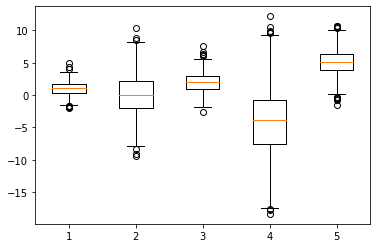

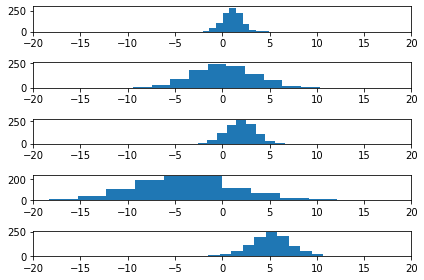

In [52]:
np.random.seed(1)

a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 3, 1000)
c = np.random.normal(2, 1.5, 1000)
d = np.random.normal(-4, 5, 1000)
e = np.random.normal(5, 2, 1000)
plt.boxplot([a,b,c,d,e])
plt.show()
plt.subplot(511)
plt.hist(a)
plt.xlim([-20,20])
plt.subplot(512)
plt.hist(b)
plt.xlim([-20,20])
plt.subplot(513)
plt.hist(c)
plt.xlim([-20,20])
plt.subplot(514)
plt.hist(d)
plt.xlim([-20,20])
plt.subplot(515)
plt.hist(e)
plt.xlim([-20,20])
plt.tight_layout()
plt.show()